# Sensitivity Analysis

In [1]:
import numpy as np

In [2]:
from ULBC import vec_to_numpy, mat_to_numpy

In [3]:
y0 = np.array([4.5, 1.5])

In [4]:
R.<x,y> = QQ[]
odes = vector([-y, x])

In [5]:
import sympy
t_ = sympy.var('_')

In [6]:
list(odes)

[-y, x]

In [7]:
f = vec_to_numpy(R, odes)
f(0, np.array([1, 2]))

[-2, 1]

In [8]:
jac = mat_to_numpy(R, jacobian(odes, R.gens()))
jac(0, np.array([1, 2]))

array([[ 0, -1],
       [ 1,  0]])

In [9]:
from scipy.integrate import solve_ivp

In [10]:
sln = solve_ivp(f, (0, 10), y0, method='LSODA', jac=jac, vectorized=True,
                events=[(lambda t, x: x[0])],
                dense_output=True)
sln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 128
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f8b44d55b90>
   status: 0
  success: True
        t: array([ 0.        ,  0.01054209,  0.02108418,  0.13608572,  0.25108726,
        0.3660888 ,  0.64557237,  0.92505595,  1.20453953,  1.37031421,
        1.5360889 ,  1.70186358,  1.86763826,  1.93769171,  2.00774515,
        2.0777986 ,  2.3625439 ,  2.64728921,  2.93203452,  3.21677982,
        3.50152513,  3.78627044,  4.07101575,  4.3014447 ,  4.53187366,
        4.76230262,  4.99273158,  5.07426596,  5.15580034,  5.23733472,
        5.52313162,  5.80892851,  6.0947254 ,  6.3805223 ,  6.4573511 ,
        6.5341799 ,  6.6110087 ,  6.89046806,  7.16992742,  7.44938678,
        7.72884614,  7.92116269,  8.11347923,  8.30579578,  8.49811233,
        8.61228097,  8.7264496 ,  8.84061824,  9.11839163,  9.14472335,
        9.17105508,  9.1973868 ,  9.223

In [11]:
from itertools import cycle

In [12]:
zip(sln.t_events[0], cycle([0]))

[(1.249257269985202, 0), (4.391176875509009, 0), (7.532966619222182, 0)]

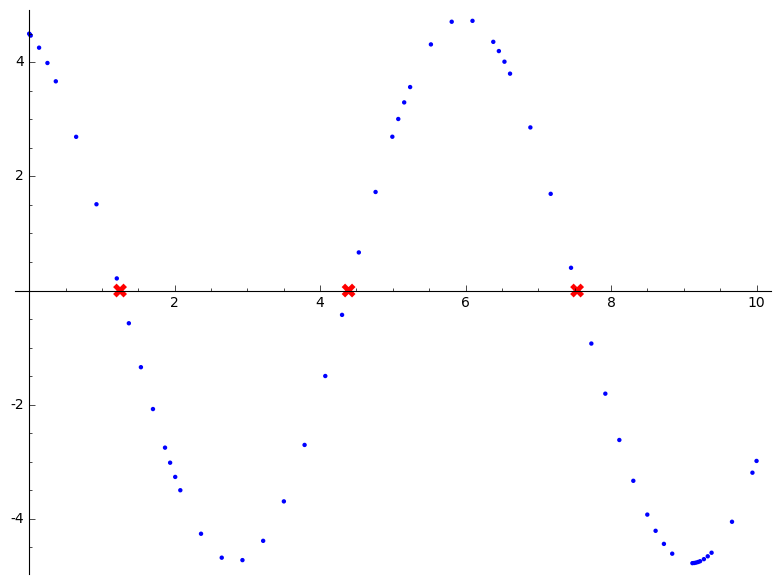

In [13]:
points(zip(sln.t, sln.y[0, :]))\
+ points(zip(sln.t_events[0], cycle([0])),
         color='red', marker='X', size=100)

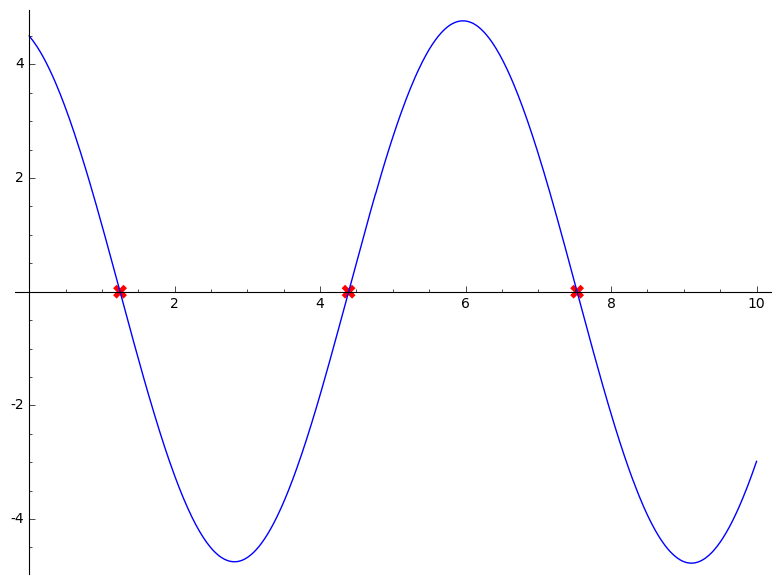

In [14]:
plot((lambda t: sln.sol(t)[0]), (0, 10))\
+ points(zip(sln.t_events[0], cycle([0])),
         color='red', marker='X', size=100)

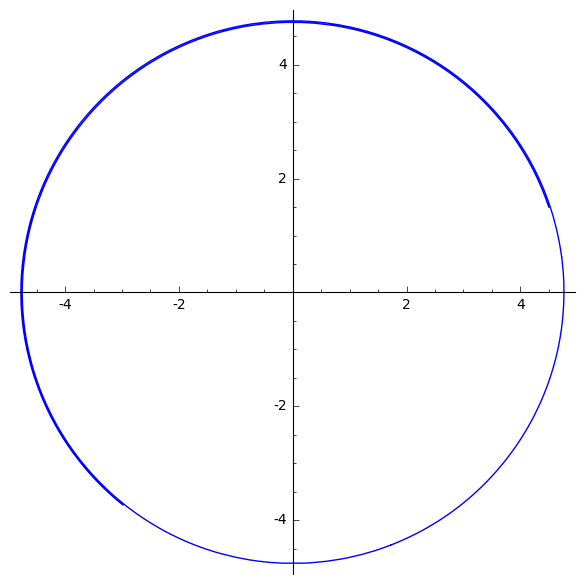

In [15]:
parametric_plot(((lambda t: sln.sol(t)[0]),
                 (lambda t: sln.sol(t)[1])),
                (0, 10))

In [16]:
load('ULBC.py')

In [17]:
Atomic(x - 3).numerical_signal_for_system(odes, y0, 10)

Signal([0.00000000000000000 .. 10.000000000000000], [([0.00000000000000000 .. 0.56458902188736560], True), ([0.56458902188736559 .. 5.0728223633526906], False), ([5.0728223633526905 .. 6.8526089639259010], True), ([6.8526089639259009 .. 10.000000000000000], False)])

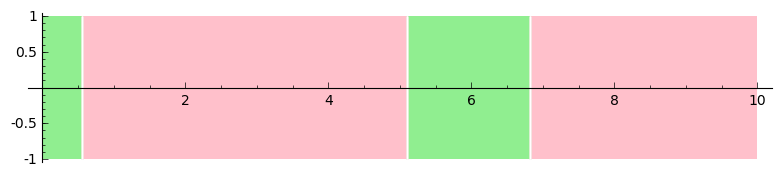

In [18]:
Atomic(x - 3).numerical_signal_for_system(odes, y0, 10).plot()

In [19]:
odes

(-y, x)

In [20]:
list(map(RIF, list(y0)))

[4.5000000000000000?, 1.5000000000000000?]

In [21]:
inter = RIF(-1e-3,1e-3)
#y01 = [RIF(4.5) + inter, RIF(1.5) + inter]
y01 = [RIF(4.5) + inter, RIF(1.5) + inter]

In [22]:
P = Atomic(x - 3.0)
reach = Reach(odes, y01, 10, order=10, step=0.1)
print(reach.res)
rs = reach.roots(x - 3.0, -y)
rs

2


[0.564?, 5.076?, 6.848?]

In [23]:
P.dpdt(odes)

-y

Computed 100 flowpipes in 0.206318855286 sec
Prepared for plotting in 0.161048173904 sec
roots = [0.564?, 5.076?, 6.848?]
  I  = [0.00000000000000000 .. 0.56397999880745454]
f(I) = [-0.00032725909108011209 .. 1.5010000000000022]
  I  = [0.56469811254665946 .. 5.0750062758354658]
f(I) = [-7.7675691814720374 .. 0.0079513927227052861]
  I  = [5.0754638139965040 .. 6.8471117883942681]
f(I) = [-0.0036722733674379172 .. 1.7650221611385027]
Monitored signal 0.263782024384 sec


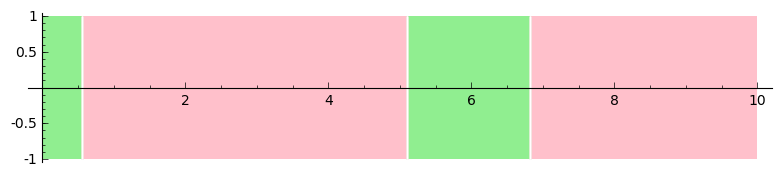

In [24]:
Atomic(x - 3.0).signal_for_system(odes, y01, 10).plot()

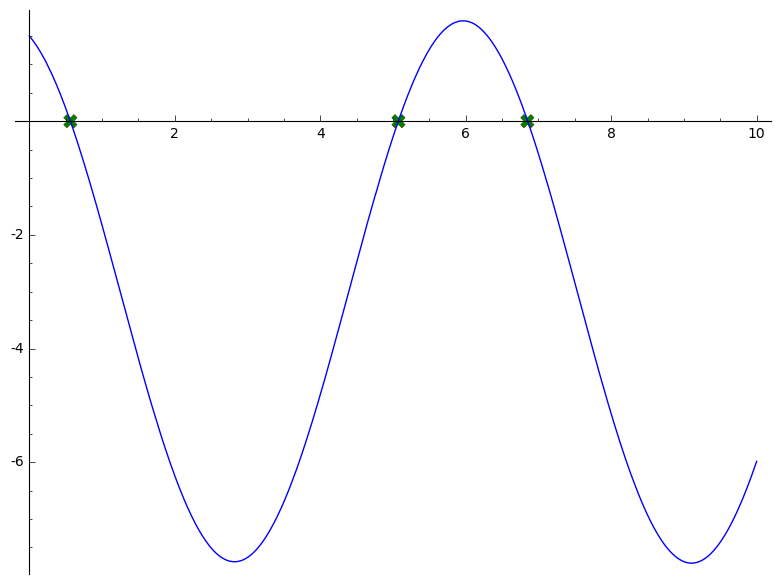

In [25]:
plot((lambda t: sln.sol(t)[0] - 3), (0, 10))\
 + points([(r.lower(), 0) for r in rs],
          color='red', marker='X', size=100)\
 + points([(r.upper(), 0) for r in rs],
          color='green', marker='X', size=100)#\
# + reach.sage_plot('x')

Computed 75 flowpipes in 0.156439065933 sec
Prepared for plotting in 0.130101919174 sec
roots = [0.564?, 5.076?, 6.848?]
  I  = [0.00000000000000000 .. 0.56397999880745454]
f(I) = [-0.00032725909108011209 .. 1.5010000000000022]
  I  = [0.56469811254665946 .. 5.0750062758354658]
f(I) = [-7.7675691814720374 .. 0.0079513927227052861]
  I  = [5.0754638139965040 .. 6.8471117883942681]
f(I) = [-0.0036722733674379172 .. 1.7650221611385027]
Monitored signal 0.237442970276 sec


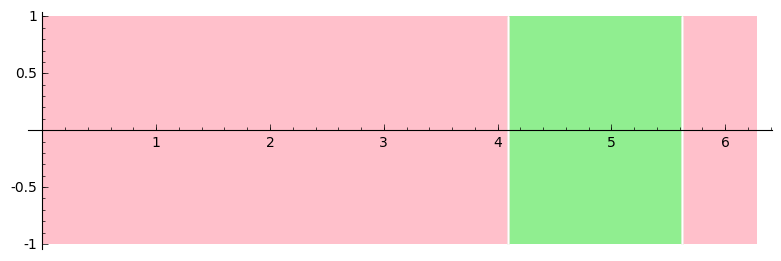

In [26]:
G(RIF(1,1.2), Atomic(x - 3)).signal_for_system(odes, y01, 2*pi).plot()

interval_signals.py:123: UserWarning: Inconsitient intervals [4.0728222341462183 .. 5.6526092220169764] (True) and [5.6526092220169754 .. 6.4831853071795873] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:123: UserWarning: Inconsitient intervals [4.0728222341462183 .. 5.6526092220169764] (True) and [5.6526092220169754 .. 6.2831853071795872] (False) in signal!
  u.str(style='brackets'), bu))


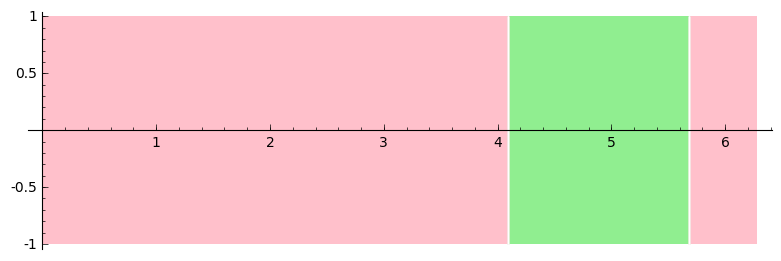

In [27]:
G(RIF(1,1.2), Atomic(x - 3)).numerical_signal_for_system(odes, y0, 2*pi).plot()

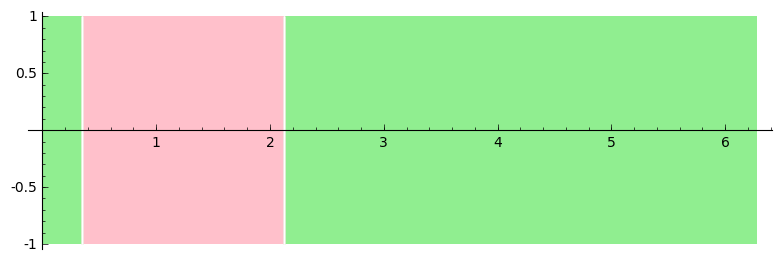

In [28]:
Atomic(3 - y).numerical_signal_for_system(odes, y0, 2*pi).plot()

Computed 63 flowpipes in 0.187126159668 sec
Prepared for plotting in 0.150750875473 sec
roots = [0.363?, 2.135?]
  I  = [0.00000000000000000 .. 0.36262167780632155]
f(I) = [-0.0056273765389689423 .. 1.5010000000000008]
  I  = [0.36326071243919583 .. 2.1347432684716706]
f(I) = [-1.7627437368777823 .. 0.0037127600950843665]
Monitored signal 0.204188108444 sec


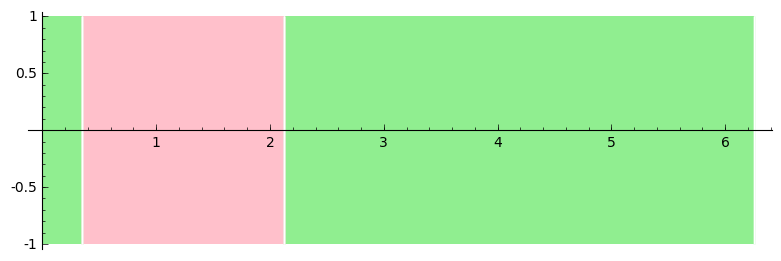

In [29]:
Atomic(3 - y).signal_for_system(odes, y01, 2*pi).plot()

Computed 103 flowpipes in 0.202324867249 sec
Prepared for plotting in 0.163830041885 sec
roots = [0.363?, 2.135?, 6.646?, 8.418?]
  I  = [0.00000000000000000 .. 0.36262167780632155]
f(I) = [-0.0056273765389689423 .. 1.5010000000000008]
  I  = [0.36326071243919583 .. 2.1347432684716706]
f(I) = [-1.7627437368777823 .. 0.0037127600950843665]
  I  = [2.1355199135907523 .. 6.6458109904106007]
f(I) = [-0.0030865066176373191 .. 7.7683288721205699]
  I  = [6.6465012424439979 .. 8.4179353440916920]
f(I) = [-1.7660184879904320 .. 0.0037937849975722138]
Monitored signal 0.361171007156 sec


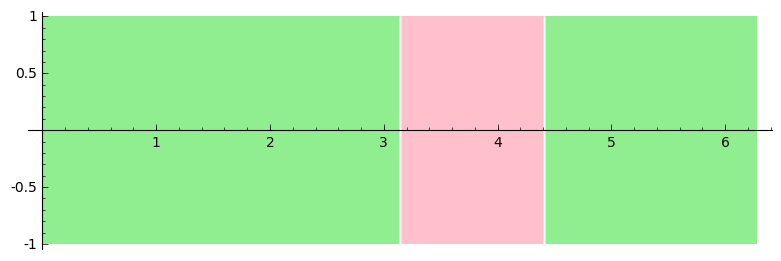

In [30]:
F(RIF(3.5,4), Atomic(3 - y)).signal_for_system(odes, y01, 2*pi).plot()

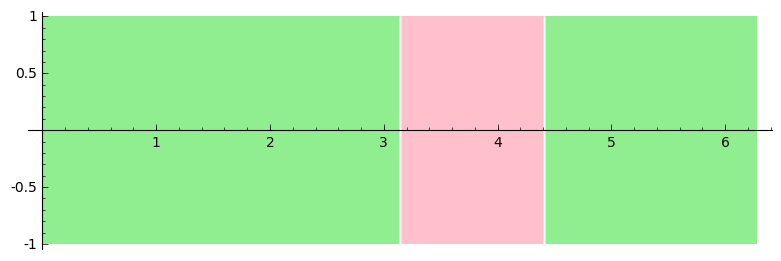

In [31]:
F(RIF(3.5,4), Atomic(3 - y)).numerical_signal_for_system(odes, y0, 2*pi).plot()

Computed 103 flowpipes in 0.27196598053 sec
Prepared for plotting in 0.280392169952 sec
roots = [0.564?, 5.076?, 6.848?]
  I  = [0.00000000000000000 .. 0.56397999880745454]
f(I) = [-0.00032725909108011209 .. 1.5010000000000022]
  I  = [0.56469811254665946 .. 5.0750062758354658]
f(I) = [-7.7675691814720374 .. 0.0079513927227052861]
  I  = [5.0754638139965040 .. 6.8471117883942681]
f(I) = [-0.0036722733674379172 .. 1.7650221611385027]
roots = [0.363?, 2.135?, 6.646?, 8.418?]
  I  = [0.00000000000000000 .. 0.36262167780632155]
f(I) = [-0.0056273765389689423 .. 1.5010000000000008]
  I  = [0.36326071243919583 .. 2.1347432684716706]
f(I) = [-1.7627437368777823 .. 0.0037127600950843665]
  I  = [2.1355199135907523 .. 6.6458109904106007]
f(I) = [-0.0030865066176373191 .. 7.7683288721205699]
  I  = [6.6465012424439979 .. 8.4179353440916920]
f(I) = [-1.7660184879904320 .. 0.0037937849975722138]
Monitored signal 0.687439918518 sec


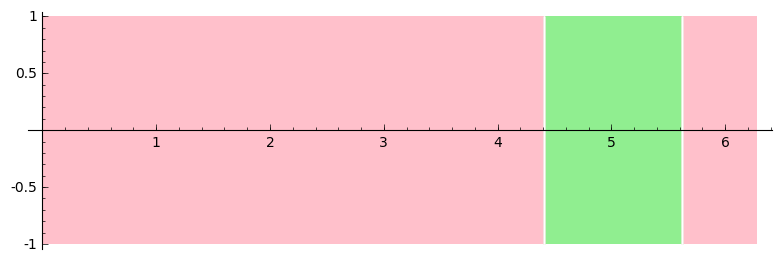

In [32]:
(G(RIF(1,1.2), Atomic(x - 3)) & F(RIF(3.5,4), Atomic(3 - y))).signal_for_system(odes, y01, 2*pi).plot()

interval_signals.py:123: UserWarning: Inconsitient intervals [4.0728223722879777 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 9.2831853071795881] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:123: UserWarning: Inconsitient intervals [4.4245682451676380 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 9.2831853071795881] (False) in signal!
  u.str(style='brackets'), bu))
interval_signals.py:123: UserWarning: Inconsitient intervals [4.4245682451676380 .. 5.6526089460790150] (True) and [5.6526089460790140 .. 6.2831853071795872] (False) in signal!
  u.str(style='brackets'), bu))


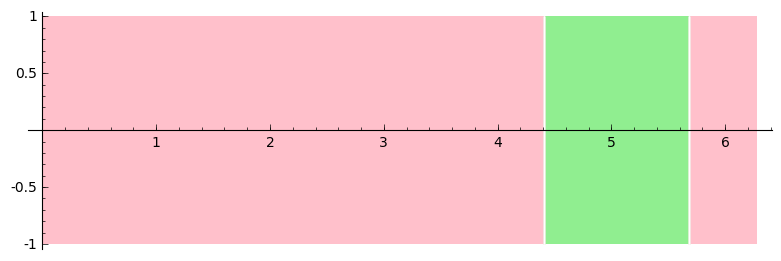

In [33]:
(G(RIF(1,1.2), Atomic(x - 3)) & F(RIF(3.5,4), Atomic(3 - y))).numerical_signal_for_system(odes, y0, 2*pi).plot()

## Real example: Welks and lobsters

In [34]:
us = [x,y]
k=RIF(0.8); b=RIF(0.6); c=RIF(0.3); e=RIF(0.05); f=RIF(2)
vf = vector([b*x*(RIF(1)-x) - c*x*(k-x)*y,
            -e*y*(RIF(1)+y)+f*x*(k-x)*y])
v0 = [RIF(0.5), RIF(2.0)]
v1 = [RIF(0.4), RIF(2.5)]
v2 = [RIF(1,1.2), RIF(4,6)]

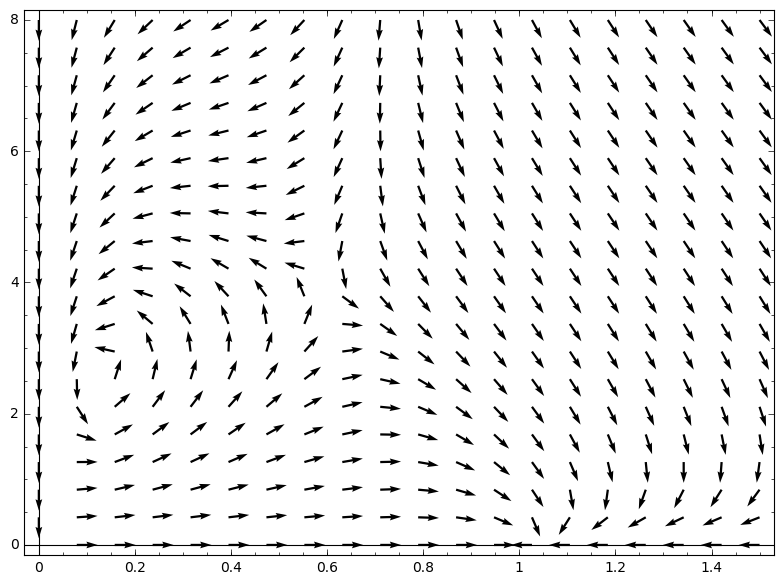

In [35]:
plot_vector_field((SR^2)(vf)/(SR^2)(vf).norm(),(x,0,1.5),(y,0,8))

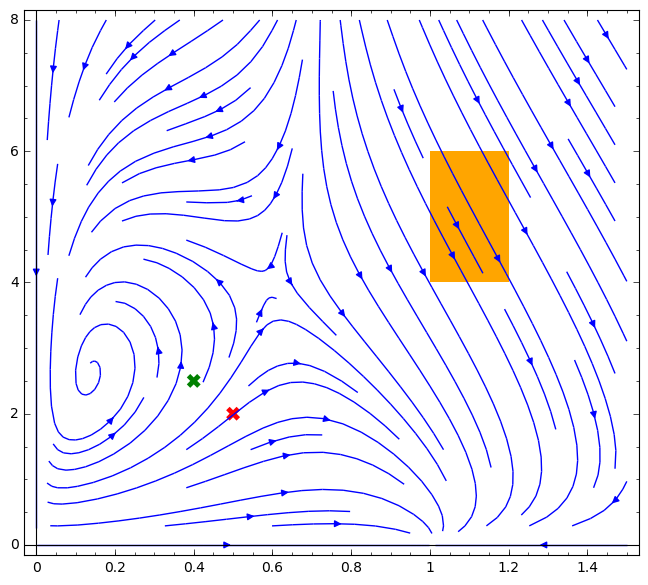

In [36]:
p = streamline_plot(tuple(vf),(x,0,1.5),(y,0,8))\
    + point(v0, size=100, marker='X', color='red')\
    + point(v1, size=100, marker='X', color='green')\
    + polygon([(v2[0].lower(), v2[1].lower()),
               (v2[0].lower(), v2[1].upper()),
               (v2[0].upper(), v2[1].upper()),
               (v2[0].upper(), v2[1].lower())],
              color='orange')
p.set_aspect_ratio(1/6)
p.show()

In [37]:
P = Atomic((x - 1)^2 + y^2 - 0.1)

In [38]:
sln = solve_ivp(vec_to_numpy(R, vf),
                (0, 20), v0,
                method='LSODA', vectorized=True,
                dense_output=True,
                events=(lambda _, (x, y): (x - 1)^2 + y - 0.1))
sln

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 76
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7f8b40f2f2d0>
   status: 0
  success: True
        t: array([ 0.        ,  0.20008999,  0.40017999,  0.9710477 ,  1.54191541,
        2.11278312,  3.20489744,  4.29701176,  4.97165901,  5.64630626,
        6.32095351,  6.99560076,  7.25083687,  7.50607298,  7.76130909,
        8.05625241,  8.35119574,  8.64613906,  9.19397061,  9.74180216,
       10.28963371, 10.83746525, 11.3852968 , 11.93312835, 12.4809599 ,
       13.02879145, 13.57662299, 14.12445454, 14.74703921, 15.36962389,
       15.99220856, 16.61479323, 17.23737791, 18.02353807, 18.80969823,
       19.59585839, 20.        ])
 t_events: [array([10.92388566])]
        y: array([[0.50000000000000000?, 0.511769892309286, 0.5233346774410491,
        0.5557746858867384, 0.5876674327854491, 0.6202755023375599,
        0.6897011122413346, 0.7776545022

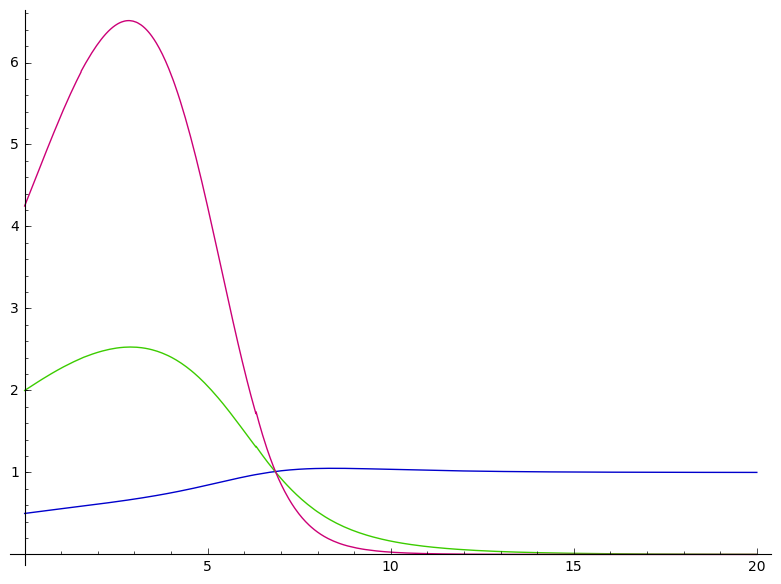

In [39]:
plot(((lambda t: sln.sol(t)[0]),
      (lambda t: sln.sol(t)[1]),
      (lambda t: (sln.sol(t)[0] - 1)^2 + sln.sol(t)[1]^2)),
     (0, 20))

In [40]:
W = QQ['x, y']

In [41]:
nvf = [sum(c.center()*W.gens()[0]^ex*W.gens()[1]^ey
     for c, (ex, ey) in zip(p.coefficients(), p.exponents())) for p in vf]
nvf

[0.300000000000000*x^2*y - 0.600000000000000*x^2 - 0.240000000000000*x*y + 0.600000000000000*x,
 -2.00000000000000*x^2*y + 1.60000000000000*x*y - 0.0500000000000000*y^2 - 0.0500000000000000*y]

In [42]:
nv0 = [v.center() for v in v0]
nv0

[0.500000000000000, 2.00000000000000]

In [43]:
#P.numerical_signal_for_system(nvf, v0, 20).plot()

Computed 200 flowpipes in 1.00392198563 sec
Prepared for plotting in 0.0751988887787 sec
roots = [8.86?]
  I  = [0.00000000000000000 .. 8.8500731529818620]
f(I) = [-0.85344434175676410 .. 7.4241497834511004]
Monitored signal 0.112280130386 sec


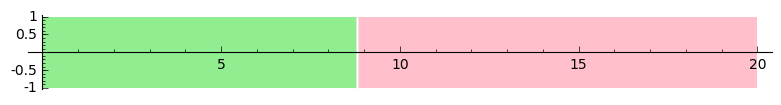

In [44]:
P.signal_for_system(vf, v0, 20, order=3, step=0.1).plot()

Computed 250 flowpipes in 0.992819070816 sec
Prepared for plotting in 0.0642530918121 sec
roots = [8.86?]
  I  = [0.00000000000000000 .. 8.8500731529818620]
f(I) = [-0.85344434175676410 .. 7.4241497834511004]
Monitored signal 0.10063791275 sec


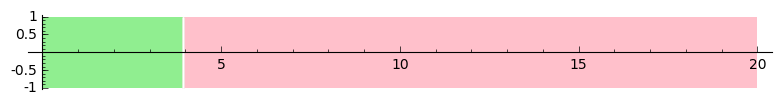

In [46]:
G(RIF(0, 5), P).signal_for_system(vf, v0, 20, order=3, step=0.1).plot()

Computed 400 flowpipes in 15.408657074 sec
Prepared for plotting in 0.459636926651 sec
roots = []
Monitored signal 0.520576000214 sec


/usr/lib64/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


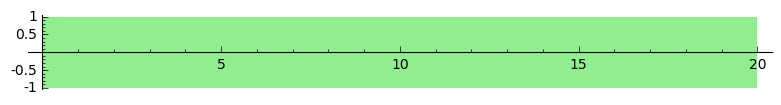

In [47]:
G(RIF(0, 20), P).signal_for_system(vf, v1, 20, order=10, step=0.1).plot()

In [48]:
reach = Reach(vf, v2, 20, order=5, step=0.01)

In [49]:
reach.prepare()

In [52]:
index_fn(P.p)(reach(RIF(3,4))).str(style='brackets')

'[-0.31874472771564611 .. 0.21103535262425855]'

In [ ]:
P.signal_for_system(vf, v2, 20, order=5, step=0.01).plot()

Computed 500 flowpipes in 5.07735610008 sec
Prepared for plotting in 2.57378387451 sec
  I  = [0.00000000000000000 .. 0.78632044821129899]
f(I) = [-0.77589586176757220 .. 37.452520432148440]
  I  = [0.78632144821129912 .. 0.79207471096033433]
f(I) = [-0.56126334195666728 .. 8.7743391758689758]
  I  = [0.79207571096033435 .. 0.80000000000000049]
f(I) = [-0.58756212930487229 .. 8.6120884232626978]
Monitored signal 68.4860060215 sec


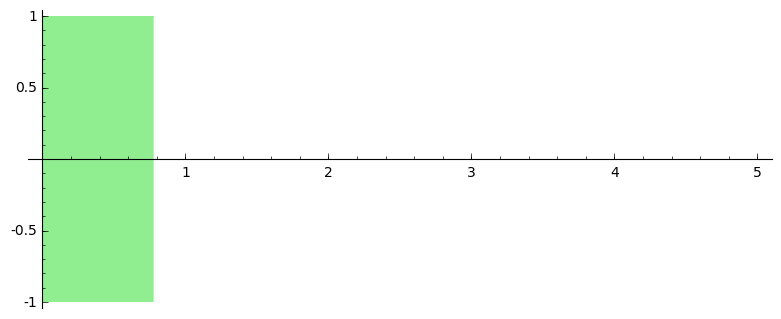

In [49]:
P.signal_for_system(vf, v2, 5, order=(3,20), step=0.01).plot()

Computed 147 flowpipes in 4.48817205429 sec
Prepared for plotting in 6.94761300087 sec
  I  = [0.00000000000000000 .. 0.79385721333111459]
f(I) = [-0.78101744756907988 .. 37.442306860062651]
  I  = [0.79385821333111461 .. 0.80673829059986358]
f(I) = [-0.58494254206843000 .. 8.5409050707368924]
  I  = [0.80673929059986371 .. 0.82500465124893863]
f(I) = [-0.64640767704360958 .. 8.1940332303971193]
Monitored signal 25.3290810585 sec


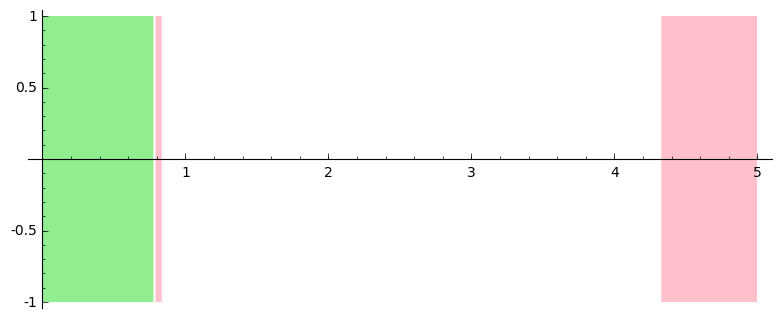

In [141]:
P.signal_for_system(vf, v2, 5, order=5, step=(0.001, 0.05),
                    precondition=1,
                    estimation=1e-3,
                    integrationScheme=2,
                    cutoff_threshold=1e-5).plot()

In [133]:
reach = Reach(
    vf,
    v2,
    5,
    step=(0.001, 0.05),
    order=5,
    precondition=1,
    estimation=1e-3,
    integrationScheme=2,
    cutoff_threshold=1e-5
)

In [134]:
reach.num_flowpipes

147

In [135]:
reach.roots(P.p, P.dpdt(odes))

[1.?e1]

In [136]:
Out[109][0].str(style='brackets')

'[0.83403490192890705 .. 3.9705961451099934]'

In [137]:
P.signal_for_system(
    vf,
    v2,
    5,
    step=(0.001, 0.01),
    order=4,
    precondition=1,
    estimation=1e-4,
    integrationScheme=1,
    cutoff_threshold=1e-6
)

Computed 670 flowpipes in 10.1950938702 sec
Prepared for plotting in 16.5521681309 sec
  I  = [0.00000000000000000 .. 0.82384310824369467]
f(I) = [-0.79243397099032365 .. 37.414952107048635]
  I  = [0.82384410824369480 .. 0.82707023662316004]
f(I) = [-0.52133859944781369 .. 7.7239904869852812]
  I  = [0.82707123662316017 .. 0.83088424483822355]
f(I) = [-0.53575787702542100 .. 7.6442230314903883]
  I  = [0.83088524483822367 .. 0.83403490192890706]
f(I) = [-0.52921956467612886 .. 7.5462815328113724]
Monitored signal 24.4378259182 sec


Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 0.82384310824369467], True), ([0.82384410824369480 .. 0.82707023662316004], False), ([0.82707123662316017 .. 0.83088424483822355], False), ([0.83088524483822367 .. 0.83403490192890706], False), ([3.9705961451099933 .. 5.0000000000000000], False)])

In [118]:
K1 = RIF(0.83088524483822367, 0.83403490192890706)
reach(K1)

[2.?, 1.?e1]

In [123]:
index_fn(P.p)(reach(K1.center())).str(style='brackets')

'[-0.51909080001277453 .. 7.5343389781639206]'

In [120]:
K2 = RIF(0.82384410824369480,0.82707023662316004)
reach(K2)

[2.?, 1.?e1]

In [124]:
load('interval_signals.py')

In [122]:
index_fn(P.p)(reach(K2.center())).str(style='brackets')

'[-0.50035011654415085 .. 7.6475736165941611]'

In [131]:
signal_given_roots(lambda t: index_fn(P.p)(reach(t)), Out[109], RIF(0, 5))

  I  = [0.00000000000000000 .. 0.83403490192890706]
f(I) = [-0.81634611163846583 .. 37.414952107048635]


Signal([0.00000000000000000 .. 5.0000000000000000], [([0.00000000000000000 .. 0.83403490192890706], True), ([3.9705961451099933 .. 5.0000000000000000], False)])

Computed 500 flowpipes in 5.12299990654 sec
Prepared for plotting in 3.61406517029 sec
  I  = [0.00000000000000000 .. 0.76776273744384971]
f(I) = [-0.76444848864792503 .. 37.468566526668994]
  I  = [0.76776373744384984 .. 0.77310335932743446]
f(I) = [-0.56432364898018550 .. 9.3283399659019946]
  I  = [0.77310435932743459 .. 0.78000000000000048]
f(I) = [-0.59553366174961520 .. 9.1692311431820955]
Monitored signal 61.8684020042 sec


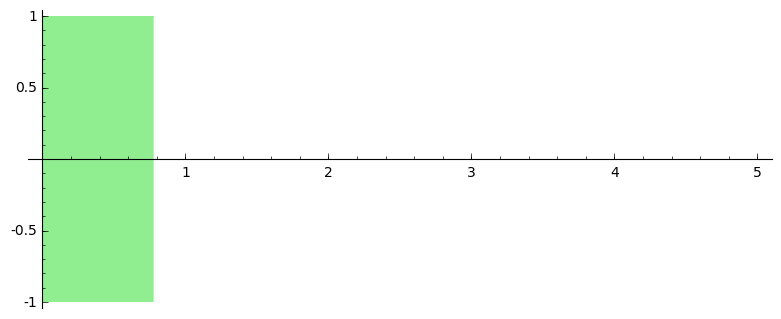

In [77]:
P.signal_for_system(vf, v2, 5, order=(3,20), step=0.01,
                    precondition=1,
                    estimation=1e-4,
                    integrationScheme=2,
                    cutoff_threshold=1e-5).plot()